In [190]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
import rasterio
import geopandas as gpd
import os
import glob
import cmocean
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import mpl_toolkits.basemap as bm
import netCDF4 as nc


# Open tifs using GDAL

In [316]:
np.sort(glob.glob('/extra-space1/data/tikoralukupload/cis-weekly/tif/e-ct/EA_2020*'))

array(['/extra-space1/data/tikoralukupload/cis-weekly/tif/e-ct/EA_2020-01-06_e-ct.tif',
       '/extra-space1/data/tikoralukupload/cis-weekly/tif/e-ct/EA_2020-01-13_e-ct.tif',
       '/extra-space1/data/tikoralukupload/cis-weekly/tif/e-ct/EA_2020-01-20_e-ct.tif',
       '/extra-space1/data/tikoralukupload/cis-weekly/tif/e-ct/EA_2020-01-27_e-ct.tif',
       '/extra-space1/data/tikoralukupload/cis-weekly/tif/e-ct/EA_2020-02-03_e-ct.tif',
       '/extra-space1/data/tikoralukupload/cis-weekly/tif/e-ct/EA_2020-02-10_e-ct.tif',
       '/extra-space1/data/tikoralukupload/cis-weekly/tif/e-ct/EA_2020-02-17_e-ct.tif',
       '/extra-space1/data/tikoralukupload/cis-weekly/tif/e-ct/EA_2020-02-24_e-ct.tif',
       '/extra-space1/data/tikoralukupload/cis-weekly/tif/e-ct/EA_2020-03-02_e-ct.tif',
       '/extra-space1/data/tikoralukupload/cis-weekly/tif/e-ct/EA_2020-03-09_e-ct.tif',
       '/extra-space1/data/tikoralukupload/cis-weekly/tif/e-ct/EA_2020-03-16_e-ct.tif',
       '/extra-space1/data/tikor

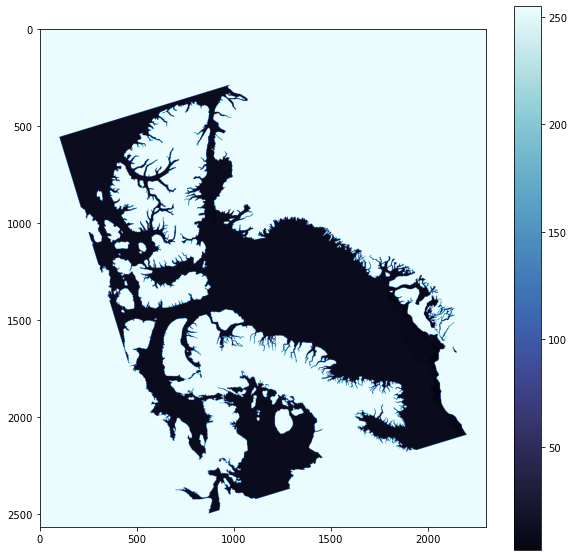

In [322]:
# path = '/home/mwang/CIS-project/data/cis-weekly/tif/n-ct/'

# which dates
dates = ['2020-01-27', '2020-02-24', '2020-05-25', '2020-06-29','2020-07-27', '2020-08-24']
# egg code
ec = 'e-ct'
# Region
region = 'EA'

path = '/extra-space1/data/tikoralukupload/cis-weekly/tif/'
# ds = gdal.Open(path + 'e-ct/EA_2020-02-24_e-ct.tif')
# ds2 = gdal.Open(path + 'e-ct/EA_2020-05-25_e-ct.tif')
# ds3 = gdal.Open(path + 'e-ct/EA_2020-06-29_e-ct.tif')

ds = []
for i in range(len(dates)):
    ds.append(gdal.Open(path + ec + '/' + region + '_' + dates[i] + '_' + ec + '.tif'))


# Note GetRasterBand() takes band no. starting from 1 not 0
band = ds[0].GetRasterBand(1)
arr = band.ReadAsArray()

plt.figure(figsize=(10,10))
plt.imshow(arr, cmap=cmocean.cm.ice)
plt.colorbar()
# plt.clim(0,100)
plt.show()

In [323]:
# Get projection info
print(ds[0].GetProjection())

# Dimensions

print('Xsize:',ds[0].RasterXSize)
print('Ysize:',ds[0].RasterYSize)

# Number of bands
print('Number of bands:', ds[0].RasterCount)

# Metadata for the raster dataset
print('Metadata: ', ds[0].GetMetadata())

# Metadata for the band
print('band metadata: ', band.GetMetadata())

PROJCS["WGS_1984_Lambert_Conformal_Conic",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",40],PARAMETER["central_meridian",-100],PARAMETER["standard_parallel_1",49],PARAMETER["standard_parallel_2",77],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
Xsize: 2299
Ysize: 2568
Number of bands: 1
Metadata:  {'AREA_OR_POINT': 'Area'}
band metadata:  {}


***

# Load in Egg code tifs

November 27

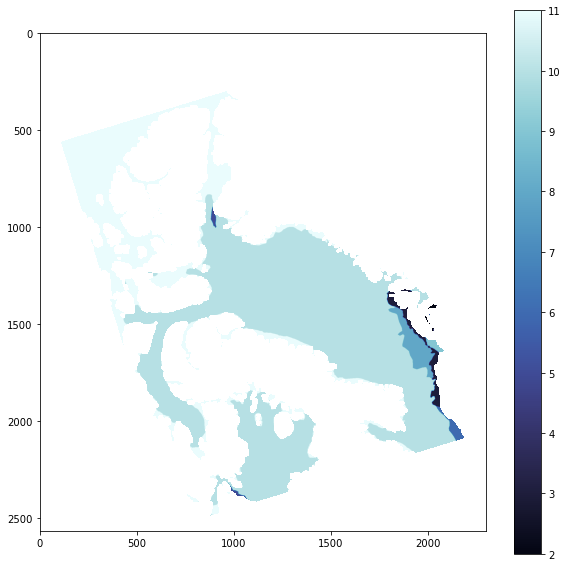

In [324]:
imarr = []
for i in range(len(ds)):
    imarr.append(np.array(ds[i].GetRasterBand(1).ReadAsArray()))

    # np.max(imarr[np.where(imarr!=255)])

arrnan = np.array(imarr.copy())
NaN = float("NaN")
arrnan = arrnan.astype(float)

# Set 255 values to NaN for plotting
arrnan[np.where(arrnan==255)] = np.nan

plt.figure(figsize=(10,10))
plt.imshow(arrnan[0],cmap=cmocean.cm.ice)
plt.colorbar()




### Plot subplots

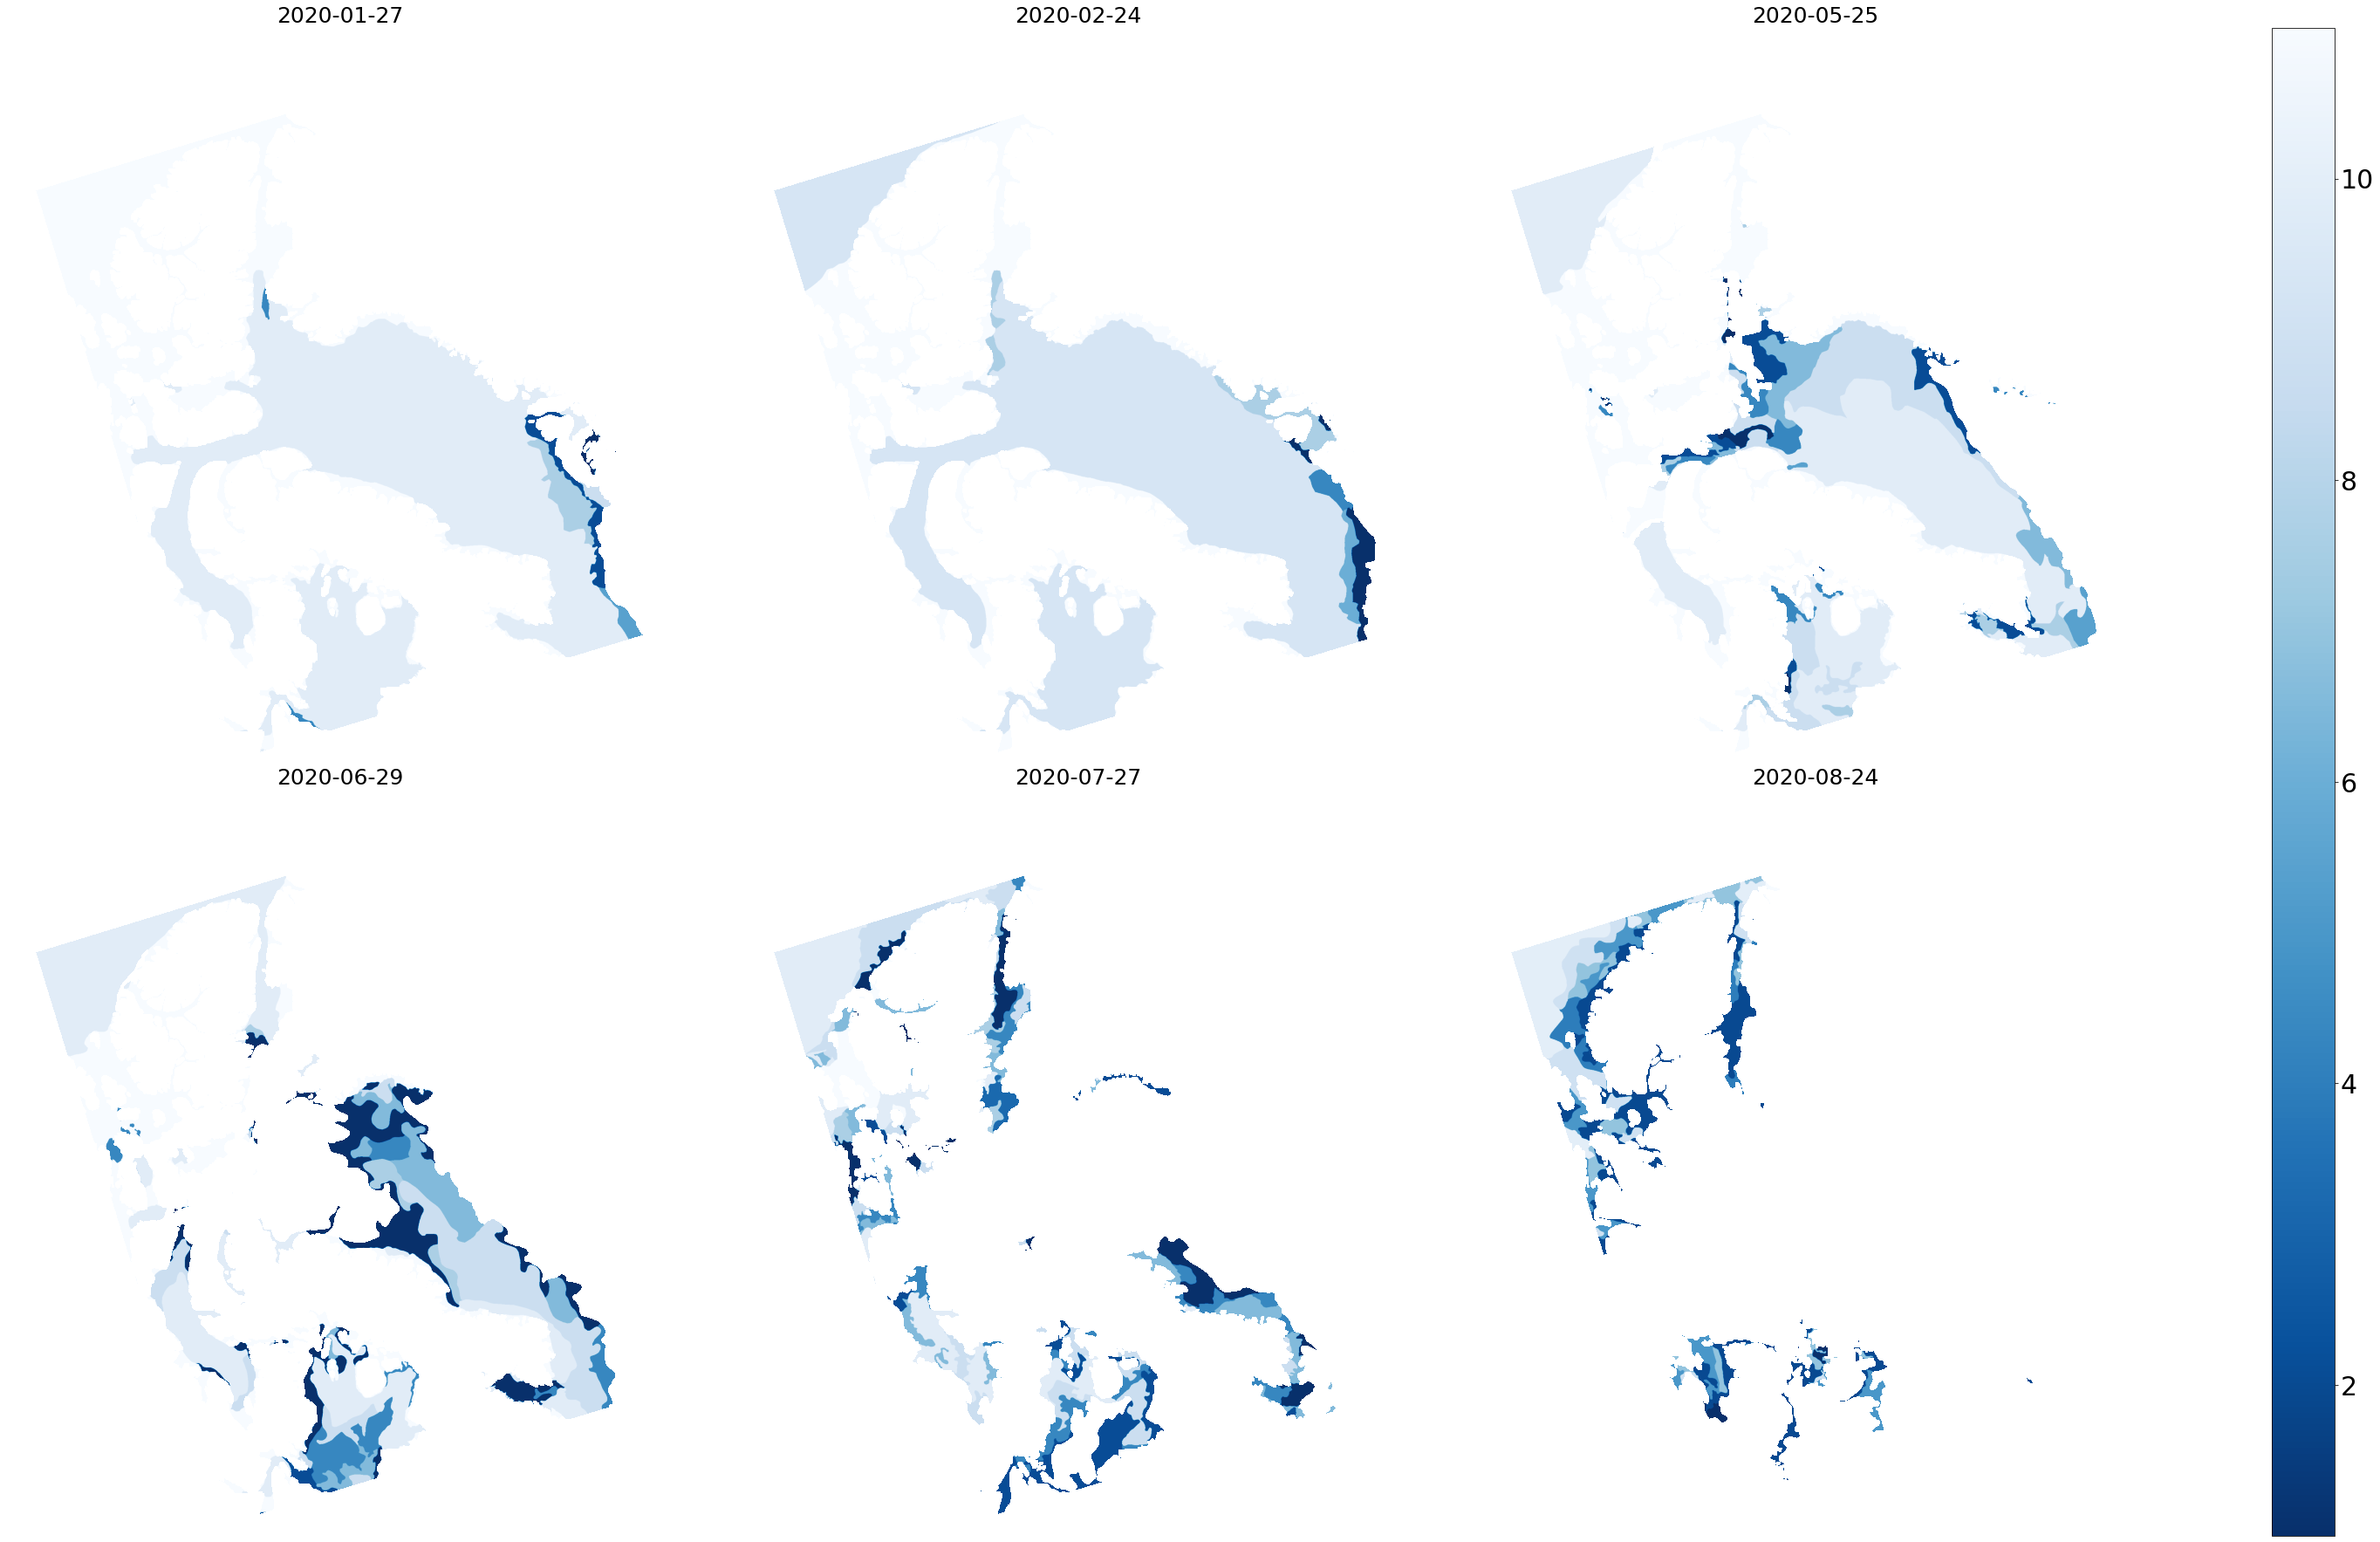

In [337]:
# More intense gradient than cmocean.cm.ice
cmap = plt.cm.get_cmap('Blues_r')

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(50, 30))
i = 0
for ax in axes.flat:
    imarr = np.array(ds[i].GetRasterBand(1).ReadAsArray())
    arrnan = imarr.copy()
    NaN = float("NaN")
    arrnan = arrnan.astype(float)
    # Set 255 values to NaN for plotting
    arrnan[np.where(arrnan==255)] = np.nan
    ax.set_axis_off()
    ax.set_title(dates[i], fontsize=25)
    im = ax.imshow(arrnan, cmap=cmap)
    i +=1
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.02, hspace=0.02)

# add an axes, lower left corner in [0.83, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8

cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(im, cax=cb_ax)
cbar.ax.tick_params(labelsize=30)

plt.show()

# Load geopackages using Geopandas

In [194]:
# Use Eastern Atlantic as example
filenames = '/home/mwang/CIS-project/data/cis-weekly/gpkg/HB_2020-06-29.gpkg'
# filenames = glob.glob('/extra-space1/data/tikoralukupload/cis-weekly/tif/e-ct/EC*')
# filenames.sort()
data = gpd.read_file(filenames)
# data.head()
data.columns

Index(['AREA', 'PERIMETER', 'CT', 'CA', 'SA', 'FA', 'CB', 'SB', 'FB', 'CC',
       'SC', 'FC', 'CN', 'CD', 'CF', 'POLY_TYPE', 'REGION', 'PNT_TYPE', 'E_CT',
       'E_CA', 'E_CB', 'E_CC', 'E_CD', 'E_SO', 'E_SA', 'E_SB', 'E_SC', 'E_SD',
       'E_SE', 'E_FA', 'E_FB', 'E_FC', 'E_FD', 'E_FE', 'E_CS', 'R_CT', 'R_CMY',
       'R_CSY', 'R_CFY', 'R_CGW', 'R_CG', 'R_CN', 'R_PMY', 'R_PSY', 'R_PFY',
       'R_PGW', 'R_PG', 'R_PN', 'R_CS', 'R_SMY', 'R_SSY', 'R_SFY', 'R_SGW',
       'R_SG', 'R_SN', 'N_CT', 'N_COI', 'N_CMY', 'N_CSY', 'N_CFY', 'N_CFY_TK',
       'N_CFY_M', 'N_CFY_TN', 'N_CYI', 'N_CGW', 'N_CG', 'N_CN', 'N_CB',
       'geometry'],
      dtype='object')

In [127]:
# data.plot(figsize=(10,10),cmap=cmocean.cm.ice)

In [143]:
# data = gpd.read_file(filenames)
data.columns

Index(['AREA', 'PERIMETER', 'ARCE00_COV.', 'ARCE00_COV.ID', 'A_LEGEND',
       'REGION', 'DATE_CARTE', 'SOURCE', 'MOD', 'EGG_ID', 'PNT_TYPE',
       'EGG_NAME', 'EGG_SCALE', 'EGG_ATTR', 'USER_ATTR', 'ROTATION', 'E_CT',
       'E_CA', 'E_CB', 'E_CC', 'E_CD', 'E_SO', 'E_SA', 'E_SB', 'E_SC', 'E_SD',
       'E_SE', 'E_FA', 'E_FB', 'E_FC', 'E_FD', 'E_FE', 'E_CS', 'R_CT', 'R_CMY',
       'R_CSY', 'R_CFY', 'R_CGW', 'R_CG', 'R_CN', 'R_PMY', 'R_PSY', 'R_PFY',
       'R_PGW', 'R_PG', 'R_PN', 'R_CS', 'R_SMY', 'R_SSY', 'R_SFY', 'R_SGW',
       'R_SG', 'R_SN', 'N_CT', 'N_COI', 'N_CMY', 'N_CSY', 'N_CFY', 'N_CFY_TK',
       'N_CFY_M', 'N_CFY_TN', 'N_CYI', 'N_CGW', 'N_CG', 'N_CN', 'N_CB',
       'geometry'],
      dtype='object')

# Egg code data

In [122]:
pd.set_option('display.max_rows', None)
np.shape(data)

(420, 69)

In [30]:
for i in range(len(filenames)):
    if data

1814

In [89]:
# a = np.array(data['E_CC'])
# a[0]

# count = 0
# for i in range(len(filenames)):
#     data = gpd.read_file(filenames[i])
#     a = np.array(data['E_CC'])
#     if np.sum(np.where(a=='')) != sum(x for x in range(0, len(a))):
#         count +=1
        
# print(count)
    

***

# Misc tools


### Convert from array to tif

In [14]:
# Change back to tif

data = imarr # 2D array
projection = 'WGS_1984_Lambert_Conformal_Conic'
geo_transform = (-295000.0, 1000.0, 0.0, 5270000.0, 0.0, -1000.0)
num_bands = 1

fileformat = gdal.GetDriverByName('GTiff')  
rows, cols = data.shape
tif = fileformat.Create('test.tif', cols, rows, num_bands, gdal.GDT_Byte)
tif.SetGeoTransform(geo_transform)
tif.SetProjection(projection)
tif.GetRasterBand(1).WriteArray(imarr)

0